<a href="https://colab.research.google.com/github/yuyangweng/Deep_Learning_Ittraining/blob/main/CNN%E7%B6%B2%E8%B7%AF%E6%A8%A1%E5%9E%8B%E5%8E%9F%E7%90%86%E8%88%87%E7%9F%A5%E5%90%8DCNN%E7%B6%B2%E8%B7%AF%E6%A8%A1%E5%9E%8B_v0_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#用PIL自動產生一張有字的圖！

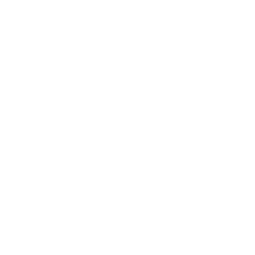

In [63]:
#產生一張255x255的全白的圖
from PIL import Image
img= Image.new('RGB', (255, 255), '#FFFFFF')
#需要將產生的圖框起來就能發現圖的邊框！
img

#查看Colab可用的所有內建字型

In [64]:
#查看Colab可用的所有內建字型
!ls /usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf

cmb10.ttf			DejaVuSerif.ttf
cmex10.ttf			LICENSE_DEJAVU
cmmi10.ttf			LICENSE_STIX
cmr10.ttf			STIXGeneralBolIta.ttf
cmss10.ttf			STIXGeneralBol.ttf
cmsy10.ttf			STIXGeneralItalic.ttf
cmtt10.ttf			STIXGeneral.ttf
DejaVuSans-BoldOblique.ttf	STIXNonUniBolIta.ttf
DejaVuSans-Bold.ttf		STIXNonUniBol.ttf
DejaVuSansDisplay.ttf		STIXNonUniIta.ttf
DejaVuSansMono-BoldOblique.ttf	STIXNonUni.ttf
DejaVuSansMono-Bold.ttf		STIXSizFiveSymReg.ttf
DejaVuSansMono-Oblique.ttf	STIXSizFourSymBol.ttf
DejaVuSansMono.ttf		STIXSizFourSymReg.ttf
DejaVuSans-Oblique.ttf		STIXSizOneSymBol.ttf
DejaVuSans.ttf			STIXSizOneSymReg.ttf
DejaVuSerif-BoldItalic.ttf	STIXSizThreeSymBol.ttf
DejaVuSerif-Bold.ttf		STIXSizThreeSymReg.ttf
DejaVuSerifDisplay.ttf		STIXSizTwoSymBol.ttf
DejaVuSerif-Italic.ttf		STIXSizTwoSymReg.ttf


#設定要使用的字型

In [65]:
from PIL import ImageFont
fontsize = 35
#font1 = ImageFont.truetype("/usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/cmb10.ttf", fontsize)
font1 = ImageFont.truetype("/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/cmb10.ttf", fontsize)
font1

#在剛產生的圖上寫字

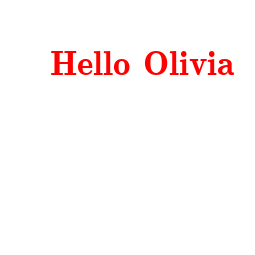

In [66]:
#在剛產生的圖上寫字
from PIL import ImageDraw
d = ImageDraw. Draw(img)
d. text((50,50), "Hello Olivia", fill=(255,0,0),font=font1)
img

#存成JPG圖檔

In [67]:
img.save('hello.jpg')

#查看剛剛存的JPG圖檔

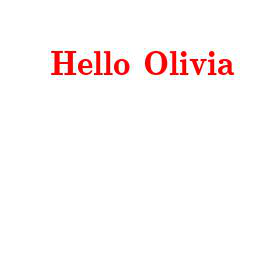

In [68]:
img = Image.open('hello.jpg')
img

#開始用Averaging filter處理該圖

#將PIL圖檔轉CV2

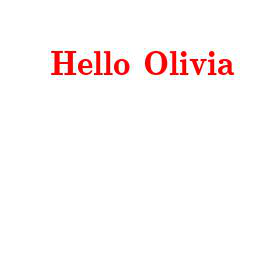

In [69]:
#將PIL圖檔轉CV2
from PIL import Image
import cv2
import numpy as np
#須注意將PIL圖轉為CV2的圖須將RGB對調
#也就是將RGB變成BGR
cv2_image = cv2.cvtColor(np.asarray(img),cv2.COLOR_RGB2BGR) 
#顯示CV2的圖
from google.colab.patches import cv2_imshow
cv2_imshow(cv2_image)

#建立第1種模糊法的kernel

In [71]:
#第1種模糊法
import numpy as np
kernel_averaging = np.ones((5,5),np.float32)/25
kernel_averaging

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]], dtype=float32)

#開始套用第1種模糊法

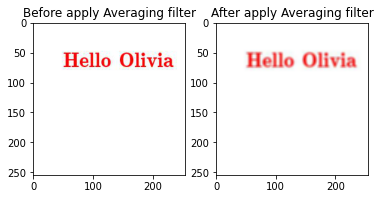

In [72]:
#開始套用第1種模糊法
dst = cv2.filter2D(cv2_image,-1,kernel_averaging)

from matplotlib import pyplot as plt
plt.subplot(121)
plt.imshow(img)
plt.title('Before apply Averaging filter')

plt.subplot(122)
#matplotlib要秀cv2的圖時仍需轉換
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.title('After apply Averaging filter')
plt.show()

#建立並套用第2種模糊法

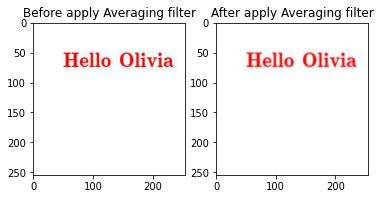

In [73]:
#第2種模糊法（此矩陣細節非本門課程範圍）
kernel = np.array((
        [0.0625, 0.125, 0.0625],
        [0.125, 0.25, 0.125],
        [0.0625, 0.125, 0.0625]), dtype="float32")
#開始套用第2種模糊法
dst = cv2.filter2D(cv2_image,-1,kernel)

from matplotlib import pyplot as plt
plt.subplot(121)
plt.imshow(img)
plt.title('Before apply Averaging filter')

plt.subplot(122)
#matplotlib要秀cv2的圖時仍需轉換
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.title('After apply Averaging filter')
plt.show()

#開始用Laplacian filter處理該圖

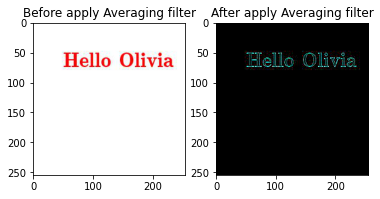

In [74]:
#Laplacian filter細節非本門課程範圍
kernel = np.array((
        [0, 1, 0],
        [1, -4, 1],
        [0, 1, 0]), dtype="int")
dst = cv2.filter2D(cv2_image,-1,kernel)

from matplotlib import pyplot as plt
plt.subplot(121)
plt.imshow(img)
plt.title('Before apply Averaging filter')

plt.subplot(122)
#matplotlib要秀cv2的圖時仍需轉換
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.title('After apply Averaging filter')
plt.show()

In [84]:
#須注意用CV2的Convolution會自動Padding
#因此圖檔並不會縮小
height, width = dst.shape[:2]
print(f'height={height}')
print(f'width={width}')

height=255
width=255


#使用沒有Padding的Convolution運算（會發現圖檔變小）

In [85]:
arr1 = np.ones((7,7))
arr1

array([[1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.]])

In [86]:
#建立簡易的kernel（用線性代數的I矩陣）
kernel_identity = np.identity(3)
kernel_identity

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [87]:
from scipy.signal import convolve2d
valid_result1 = convolve2d(arr1, kernel_identity, mode='valid')
valid_result1

array([[3., 3., 3., 3., 3.],
       [3., 3., 3., 3., 3.],
       [3., 3., 3., 3., 3.],
       [3., 3., 3., 3., 3.],
       [3., 3., 3., 3., 3.]])

#使用沒有Padding的Convolution運算（較複雜的範例）

In [88]:
arr2 = np.reshape(np.arange(25), (5,5)).astype(np.float32)
arr2

array([[ 0.,  1.,  2.,  3.,  4.],
       [ 5.,  6.,  7.,  8.,  9.],
       [10., 11., 12., 13., 14.],
       [15., 16., 17., 18., 19.],
       [20., 21., 22., 23., 24.]], dtype=float32)

In [89]:
kernel_identity

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [90]:
valid_result2 = convolve2d(arr2, kernel_identity, mode='valid')
valid_result2

array([[18., 21., 24.],
       [33., 36., 39.],
       [48., 51., 54.]])



---



#使用Keras做Zero-Padding

In [91]:
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import ZeroPadding2D

input_shape = (28,28,3)
input1 = Input(shape=input_shape)
#每一邊各補3個pixel，左右二側共補6個pixel
padding1 = ZeroPadding2D((3, 3))(input1)

print(f'input1={input1}')
print(f'padding1={padding1}')

input1=KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 3), dtype=tf.float32, name='input_3'), name='input_3', description="created by layer 'input_3'")
padding1=KerasTensor(type_spec=TensorSpec(shape=(None, 34, 34, 3), dtype=tf.float32, name=None), name='zero_padding2d_2/Pad:0', description="created by layer 'zero_padding2d_2'")


#Pooling

##Max Pooling

In [92]:
import numpy as np
arr1 = np.arange(4*4).reshape(4, 4)
arr1

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [93]:
from skimage.measure import block_reduce
max_pooling1 = block_reduce(arr1, block_size=(2, 2), func=np.max)
max_pooling1

array([[ 5,  7],
       [13, 15]])

##Average Pooling

In [94]:
arr1

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [95]:
from skimage.measure import block_reduce
average_pooling1 = block_reduce(arr1, block_size=(2, 2), func=np.average)
average_pooling1

array([[ 2.5,  4.5],
       [10.5, 12.5]])



---



#彩色圖使用沒有Padding的Convolution運算（較複雜的範例）

In [96]:
import numpy as np
#須注意numpy與keras不同，channel是寫在前面
color_arr1 = np.reshape(np.arange(3*5*5), (3,5,5)).astype(np.float32)
print(f'color_arr1={color_arr1}')
print(f'color_arr1.shape={color_arr1.shape}')

color_arr1=[[[ 0.  1.  2.  3.  4.]
  [ 5.  6.  7.  8.  9.]
  [10. 11. 12. 13. 14.]
  [15. 16. 17. 18. 19.]
  [20. 21. 22. 23. 24.]]

 [[25. 26. 27. 28. 29.]
  [30. 31. 32. 33. 34.]
  [35. 36. 37. 38. 39.]
  [40. 41. 42. 43. 44.]
  [45. 46. 47. 48. 49.]]

 [[50. 51. 52. 53. 54.]
  [55. 56. 57. 58. 59.]
  [60. 61. 62. 63. 64.]
  [65. 66. 67. 68. 69.]
  [70. 71. 72. 73. 74.]]]
color_arr1.shape=(3, 5, 5)


In [26]:
kernel_identity1 = np.identity(3)
kernel_identity2 = 2*np.identity(3)
kernel_identity3 = 3*np.identity(3)
#把前面三個kernel合成一個list
kernel_identity=np.array([kernel_identity1,kernel_identity2,kernel_identity3])
print(f'kernel_identity={kernel_identity}')
print(f'kernel_identity.shape={kernel_identity.shape}')

kernel_identity=[[[1. 0. 0.]
  [0. 1. 0.]
  [0. 0. 1.]]

 [[2. 0. 0.]
  [0. 2. 0.]
  [0. 0. 2.]]

 [[3. 0. 0.]
  [0. 3. 0.]
  [0. 0. 3.]]]
kernel_identity.shape=(3, 3, 3)


In [27]:
from scipy.signal import convolve2d
color_valid_result0 = convolve2d(color_arr1[0], kernel_identity[0], mode='valid')
color_valid_result1 = convolve2d(color_arr1[1], kernel_identity[1], mode='valid')
color_valid_result2 = convolve2d(color_arr1[2], kernel_identity[2], mode='valid')

print(f'color_valid_result0={color_valid_result0}')
print(f'color_valid_result1={color_valid_result1}')
print(f'color_valid_result2={color_valid_result2}')

color_valid_result0=[[18. 21. 24.]
 [33. 36. 39.]
 [48. 51. 54.]]
color_valid_result1=[[186. 192. 198.]
 [216. 222. 228.]
 [246. 252. 258.]]
color_valid_result2=[[504. 513. 522.]
 [549. 558. 567.]
 [594. 603. 612.]]


In [28]:
#將上述三個計算結果全都相加即可
final_color_feature_map = color_valid_result0+color_valid_result1+color_valid_result2
#由最終結果可以看出一個kernel就會有一張feature map（無論是黑白或是彩色圖皆相同）
final_color_feature_map

array([[708., 726., 744.],
       [798., 816., 834.],
       [888., 906., 924.]])



---



#反卷積（Deconvolution）

##手動用zero padding補0

In [97]:
color_valid_result0

array([[18., 21., 24.],
       [33., 36., 39.],
       [48., 51., 54.]])

In [98]:
kernel_identity1

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [99]:
#先手動用zero padding補0，之後再用scipy工具驗證結果是否相同
color_valid_result0_with_zero_padding = np.array(
  (
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 18,21,24, 0, 0],
    [0, 0, 33,36,39, 0, 0],
    [0, 0, 48,51,54, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
  ),
  dtype="int"
)
color_valid_result0_with_zero_padding

array([[ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 18, 21, 24,  0,  0],
       [ 0,  0, 33, 36, 39,  0,  0],
       [ 0,  0, 48, 51, 54,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0]])

In [100]:
from scipy import signal
tmp = signal.convolve(kernel_identity1, color_valid_result0_with_zero_padding,mode='valid')
tmp

array([[ 18.,  21.,  24.,   0.,   0.],
       [ 33.,  54.,  60.,  24.,   0.],
       [ 48.,  84., 108.,  60.,  24.],
       [  0.,  48.,  84.,  90.,  39.],
       [  0.,   0.,  48.,  51.,  54.]])

##用scipy實現上述過程（不用親自手動補padding）

In [33]:
#用scipy實現上述過程（不用親自手動補padding）
from scipy import signal
#須注意此刻不使用mode='valid'，否則只會輸出單一常數
deconv1 = signal.convolve(kernel_identity1, color_valid_result0)
deconv1

array([[ 18.,  21.,  24.,   0.,   0.],
       [ 33.,  54.,  60.,  24.,   0.],
       [ 48.,  84., 108.,  60.,  24.],
       [  0.,  48.,  84.,  90.,  39.],
       [  0.,   0.,  48.,  51.,  54.]])



---



#VGG的Conv標準化（驗證2次3x3後的大小=1次5x5）

#建立7x7大小的矩陣

In [34]:
color_valid_result0_with_zero_padding = np.array(
  (
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 18,21,24, 0, 0],
    [0, 0, 33,36,39, 0, 0],
    [0, 0, 48,51,54, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0],
  ),
  dtype="int"
)
color_valid_result0_with_zero_padding

array([[ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 18, 21, 24,  0,  0],
       [ 0,  0, 33, 36, 39,  0,  0],
       [ 0,  0, 48, 51, 54,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0]])

#建立3x3 kernel後開始進行驗證

In [35]:
kernel_identity1

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [36]:
deconv1 = signal.convolve(kernel_identity1, color_valid_result0_with_zero_padding,mode='valid')
deconv1

array([[ 18.,  21.,  24.,   0.,   0.],
       [ 33.,  54.,  60.,  24.,   0.],
       [ 48.,  84., 108.,  60.,  24.],
       [  0.,  48.,  84.,  90.,  39.],
       [  0.,   0.,  48.,  51.,  54.]])

In [37]:
deconv2 = signal.convolve(kernel_identity1, deconv1,mode='valid')
deconv2

array([[180., 141.,  72.],
       [201., 252., 159.],
       [144., 219., 252.]])



---



#UpSampling2D

#手動呼叫UpSampling2D Layer

In [101]:
import numpy as np
arr1 = np.array(
  [
   [1,2,3],
   [4,5,6],
   [7,8,9],
  ]
)
arr1

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [103]:
x = arr1.reshape(1,3,3,1)
from keras.layers import UpSampling2D
#輸出y將是EagerTensor型態
y = UpSampling2D(size=(3, 3))(x)
print(f'y.shape={y.shape}')

#將EagerTensor型態轉為numpy後又轉為2維矩陣才能方便查看
y = y.numpy().reshape(9,9)
#會發現一個數字重複了4次！
print(f'y={y}')

y.shape=(1, 9, 9, 1)
y=[[1 1 1 2 2 2 3 3 3]
 [1 1 1 2 2 2 3 3 3]
 [1 1 1 2 2 2 3 3 3]
 [4 4 4 5 5 5 6 6 6]
 [4 4 4 5 5 5 6 6 6]
 [4 4 4 5 5 5 6 6 6]
 [7 7 7 8 8 8 9 9 9]
 [7 7 7 8 8 8 9 9 9]
 [7 7 7 8 8 8 9 9 9]]


#使用Keras模型來呼叫UpSampling2D Layer

In [104]:
#載入mnist Dataset的某張圖來測試
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(f'X_train[0].shape={X_train[0].shape}')

from tensorflow.keras.layers import UpSampling2D
x = X_train[0].reshape(1,28,28,1)
y = UpSampling2D(size=(2, 2))(x)
print(f'y.shape={y.shape}')


X_train[0].shape=(28, 28)
y.shape=(1, 56, 56, 1)




---



#Softmax

In [105]:
#此array必須是float，否則會出錯：
#InvalidArgumentError: Value for attr 'T' of int64 is not in the list of allowed values: half, bfloat16, float, double
#	; NodeDef: {{node Softmax}}; Op<name=Softmax; signature=logits:T -> softmax:T; attr=T:type,allowed=[DT_HALF, DT_BFLOAT16, DT_FLOAT, DT_DOUBLE]> [Op:Softmax]
x = np.asarray([2.0,3.0,-1.0])
from tensorflow.keras.layers import Softmax
#輸出y將是EagerTensor型態
layer = Softmax()
y = layer(x).numpy()
print(f'y={y}')

y=[0.26538792 0.7213992  0.01321289]


In [106]:
#驗證所有y值相加是否會==1
y[0]+y[1]+y[2]

0.99999994

#MSE（Mean Square Error）

In [43]:
import numpy as np
y_true = 1.0
y_pred = 0.3
mse = np.mean((y_true - y_pred)**2) 
mse

0.48999999999999994

In [44]:
import numpy as np
y_true = 1.0
#會發現y_pred越接近真實答案誤差就越小
y_pred = 0.95
mse = np.mean((y_true - y_pred)**2) 
mse

0.0025000000000000044



---



#Cross Entropy

##建立Ground Truth

<BarContainer object of 10 artists>

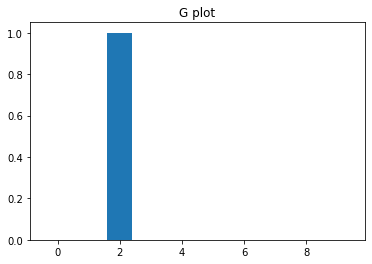

In [45]:
#建立Ground Truth
from matplotlib import pyplot as plt
#假設手寫數字圖片為2
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
y_G = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
plt.title('G plot')
plt.bar(x,y_G)

##假設估測的值

<BarContainer object of 10 artists>

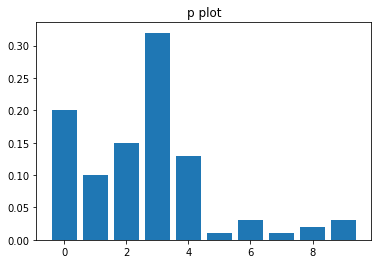

In [46]:
#假設估測出來的值為3
x = [0,   1,  2,  3,  4,  5,  6,  7,  8,  9]
y_p = [0.20, 0.10, 0.15, 0.32, 0.13, 0.01, 0.03, 0.01, 0.02, 0.03]
plt.title('p plot')
plt.bar(x,y_p)

##用Cross Entropy求這二個Distribution的距離

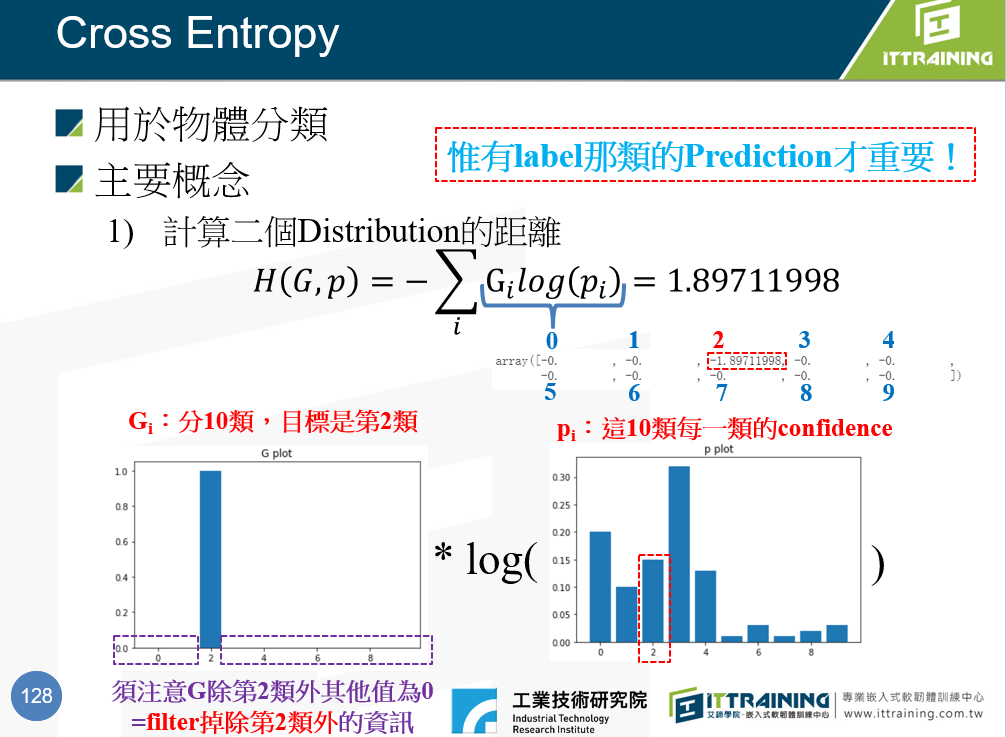

In [47]:
#用Cross Entropy求這二個Distribution的距離
import math
log_p = [math.log(data) for data in y_p]
log_p

[-1.6094379124341003,
 -2.3025850929940455,
 -1.8971199848858813,
 -1.1394342831883648,
 -2.0402208285265546,
 -4.605170185988091,
 -3.506557897319982,
 -4.605170185988091,
 -3.912023005428146,
 -3.506557897319982]

##用numpy查看這二個list分別元素相乘會如何

In [48]:
#用numpy查看這二個list分別元素相乘會如何
import numpy as np
#可觀察到由於公式的G在前面，就等於是忽略了G所不在意的區塊（等於是一種filter）
np.array(y_G) * np.array(log_p)

array([-0.        , -0.        , -1.89711998, -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ])

##將相乘後的向量的所有元素值全部加總起來後*-1

In [49]:
import numpy as np
sum = np.sum(np.array(y_G) * np.array(log_p))
sum

-1.8971199848858813

In [50]:
H = -1 *sum
H

1.8971199848858813